In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import time
from scipy.stats import linregress

#from api_keys import api_key
from citipy import citipy

In [2]:
csvpath = "../gt-prj1-crime-data/crime_09_20_clean_dupsdeleted.csv"
csvfile = pd.read_csv(csvpath,encoding="utf-8")
crime_df = pd.DataFrame(csvfile)
crime_df.head()

C:\Users\kliu3\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month
0,193651657,12/31/2019,1458,1388 LA FRANCE ST NE,LARCENY-NON VEHICLE,Edgewood,33.76053,-84.34220,2019,12
1,193651031,12/31/2019,1300,443 MORELAND AVE SE,LARCENY-NON VEHICLE,Ormewood Park,33.74179,-84.34973,2019,12
2,193650870,12/31/2019,1200,2711 METROPOLITAN PKWY SW,LARCENY-NON VEHICLE,Hammond Park,33.68092,-84.40814,2019,12
3,193651019,12/31/2019,1300,969 MARIETTA ST NW,LARCENY-NON VEHICLE,Marietta Street Artery,33.77828,-84.40910,2019,12
4,193651039,12/31/2019,1300,3070 BOLLING WAY NE,LARCENY-NON VEHICLE,Buckhead Village,33.83888,-84.37995,2019,12


In [3]:
crime_years_df=crime_df.groupby(["occur_year"])
crime_byyear=crime_years_df['UC2_Literal'].count()
crime_byyear

occur_year
2009    39297
2010    35501
2011    34833
2012    33370
2013    32389
2014    31104
2015    30046
2016    28986
2017    26373
2018    25606
2019    24842
2020    21901
Name: UC2_Literal, dtype: int64

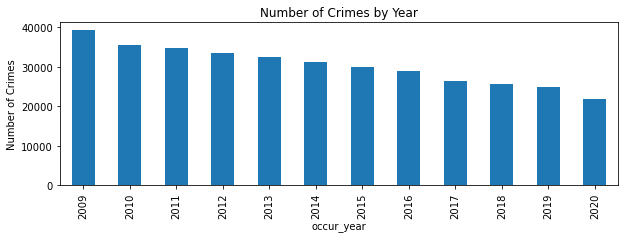

<Figure size 432x288 with 0 Axes>

In [21]:
crime_byyear_chart = crime_byyear.plot(kind='bar',figsize=(10,3), title=("Number of Crimes by Year"))

# Set the xlabel and ylabel using class methods
crime_byyear_chart.set_xlabel("occur_year")
crime_byyear_chart.set_ylabel("Number of Crimes")


plt.show()
plt.tight_layout()

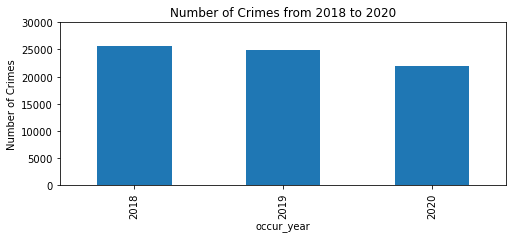

<Figure size 432x288 with 0 Axes>

In [24]:
crime_Y18_Y20_chart = crime_byyear.iloc[9:12].plot(kind='bar',figsize=(8,3), title=("Number of Crimes from 2018 to 2020"))

# Set the xlabel and ylabel using class methods
crime_Y18_Y20_chart.set_xlabel("occur_year")
crime_Y18_Y20_chart.set_ylabel("Number of Crimes")

plt.ylim(0, 30000)

plt.show()
plt.tight_layout()

In [25]:
crime_yearmonth_df=crime_df.groupby(["occur_year","occur_month"])
crime_byyearmonth=crime_yearmonth_df['UC2_Literal'].count()
crime_byyearmonth

occur_year  occur_month
2009        1              3431
            2              2635
            3              3026
            4              3062
            5              3426
                           ... 
2020        8              1802
            9              1622
            10             2314
            11             2430
            12             2467
Name: UC2_Literal, Length: 144, dtype: int64

In [41]:
three_year_month_crime = crime_byyearmonth.loc[2018:2020, :]
three_year_month_crime = three_year_month_crime.reset_index()
three_yearmonth_crime=three_year_month_crime.rename(columns={"UC2_Literal":"crimes"})
three_yearmonth_crime.head()

,occur_year,occur_month,crimes
0,2018,1,2008
1,2018,2,1938
2,2018,3,1865
3,2018,4,1971
4,2018,5,2263


36


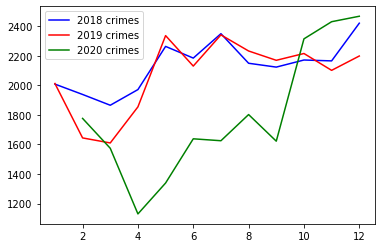

In [46]:
years=three_year_month_crime["occur_year"]
months=three_year_month_crime["occur_month"]
print(len(months))
crimes_2018, = plt.plot(months[0:12],three_yearmonth_crime['crimes'].iloc[0:12], color="blue", label="2018 crimes")
crimes_2019, = plt.plot(months[12:24], three_yearmonth_crime['crimes'].iloc[12:24], color="red", label="2019 crimes")
crimes_2020, = plt.plot(months[25:36], three_yearmonth_crime['crimes'].iloc[25:36], color="green", label="2020 crimes")
plt.legend(handles=[crimes_2018, crimes_2019,crimes_2020], loc="best")

three_year_month_crime.set_xlabel("occur_month")
plt.show()

In [ ]:
years=three_year_month_crime["occur_year"]
months=three_year_month_crime["occur_month"]
2018_crimes, = plt.plot(months, crimes.iloc[0:13], color="blue", label="2018 crimes" )

# Plot the unemployment values for a single country
country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
                        color="green",label=combined_unemployed_data.loc['USA',"Country Name"])

# Create a legend for our chart
plt.legend(handles=[months, country_one], loc="best")

# Show the chart
plt.show()

In [14]:
##  Put the months into bins and made "Seasons"
bins = [0,3,6,9,12]
seasons = ["Winter","Spring","Summer","Autumn"]

crime_df["Seasons"] = pd.cut(crime_df["occur_month"],bins,labels=seasons,include_lowest=False)
crime_df

,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month,Seasons
0,193651657,12/31/2019,1458,1388 LA FRANCE ST NE,LARCENY-NON VEHICLE,Edgewood,33.76053,-84.34220,2019,12,Autumn
1,193651031,12/31/2019,1300,443 MORELAND AVE SE,LARCENY-NON VEHICLE,Ormewood Park,33.74179,-84.34973,2019,12,Autumn
2,193650870,12/31/2019,1200,2711 METROPOLITAN PKWY SW,LARCENY-NON VEHICLE,Hammond Park,33.68092,-84.40814,2019,12,Autumn
3,193651019,12/31/2019,1300,969 MARIETTA ST NW,LARCENY-NON VEHICLE,Marietta Street Artery,33.77828,-84.40910,2019,12,Autumn
4,193651039,12/31/2019,1300,3070 BOLLING WAY NE,LARCENY-NON VEHICLE,Buckhead Village,33.83888,-84.37995,2019,12,Autumn
...,...,...,...,...,...,...,...,...,...,...,...
364243,200011298,1/1/2020,14:45,2630 MARTIN L KING JR DR SW,AUTO THEFT,Harland Terrace,33.75377,-84.47405,2020,1,Winter
364244,200011823,1/1/2020,20:00,540 HUMPHRIES ST SW,AUTO THEFT,Mechanicsville,33.73990,-84.40488,2020,1,Winter
364245,200020105,1/1/2020,21:45,1174 EUCLID AVE NE,AUTO THEFT,Inman Park,33.76553,-84.34934,2020,1,Winter
364246,200020704,1/1/2020,20:00,383 RALPH MCGILL BLVD NE,AUTO THEFT,Old Fourth Ward,33.76391,-84.37489,2020,1,Winter


In [17]:
crime_df_data = crime_df.groupby(['occur_year','Seasons'])
crime_df_data.count().head()

offense_id  occur_date  occur_time  location  UC2_Literal  \
occur_year Seasons                                                              
2009       Winter         9092        9092        9092      9092         9092   
           Spring        10170       10170       10170     10170        10170   
           Summer        10138       10138       10138     10138        10138   
           Autumn         9897        9897        9897      9897         9897   
2010       Winter         7370        7370        7370      7370         7370   

                    neighborhood    lat   long  occur_month  
occur_year Seasons                                           
2009       Winter           8804   9092   9092         9092  
           Spring           9862  10170  10170        10170  
           Summer           9775  10138  10138        10138  
           Autumn           9559   9897   9897         9897  
2010       Winter           7117   7370   7370         7370

In [16]:
crime_df_data = crime_df.groupby(['occur_year','Seasons'])
crime_count_df = crime_df_data['offense_id'].count()
crime_count_df.head()

occur_year  Seasons
2009        Winter      9092
            Spring     10170
            Summer     10138
            Autumn      9897
2010        Winter      7370
Name: offense_id, dtype: int64

In [9]:
three_year_crime_data = crime_count_df.loc[2018:2020, :]
three_year_crime_data = three_year_crime_data.reset_index()
three_year_crime_data

,occur_year,Seasons,offense_id
0,2018,Winter,3946
1,2018,Spring,6099
2,2018,Summer,6682
3,2018,Autumn,6459
4,2019,Winter,3656
5,2019,Spring,5800
6,2019,Summer,6703
7,2019,Autumn,6485
8,2020,Winter,3960
9,2020,Spring,4043


<AxesSubplot:xlabel='occur_year', ylabel='offense_id'>

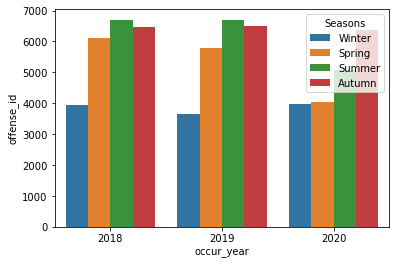

In [10]:
sns.barplot(x = 'occur_year', y = 'offense_id', hue = 'Seasons', data = three_year_crime_data)

In [47]:
!pwd

/c/Users/kliu3/Desktop/personal_dashclass/gt-prj1-crime-data
